<a href="https://colab.research.google.com/github/B612Spac/Electoral-Geo-Spatial-Analysis-/blob/main/Geospatial_Analysis_Electorial_Result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outliers Detection in Election Dataset

## Introduction

The 2023 Nigerian presidential election had everyone transfixed as it was a paramount decision to be taken by the entire country on who would be the head of states for the next 4 years.

In this project, we will be  carrying out a geospatial analysis to explore the election dataset from Adamawa State in Nigeria. Through this project, we will gain a deeper understanding of trends in electorial result accross polling units in the State.


#About the dataset

The dataset Adamawa_State_Crosschecked is the complete dataset containing necessary information needed to do the analysis. The dataset was provided by HNG cheif mentor, Mark Essien. Originally, the dataset has about 18 columns but they were dropped as they contained redundant information unecessary for thie geospatial analysis. The dataset used here contains seven colums;

1. Address: Address of the polling units that would be used to get the cordinates.
2. Longitude/Latitiude: Cordinates of the polling unit address.
3. APC/PDP/LP/NNPP: election result for each party under the polling unit

In [ ]:
#Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

In [ ]:
#Read the dataset

df = pd.read_csv('/content/Anambra Long&Lat.csv')
df

Address  Latitude  Longitude  \
0                  ST. CHARLE'S SCHOOL, AGUATA, ANAMBRA  6.008584   7.100949   
1                       AMANKWU SQUARE, AGUATA, ANAMBRA  6.008584   7.100949   
2                     COOPERATIVE HALL, AGUATA, ANAMBRA  6.008584   7.100949   
3                      OCHIEOBU SQUARE, AGUATA, ANAMBRA  6.008584   7.100949   
4                    OYE MOTOR PARK II, AGUATA, ANAMBRA  5.965620   7.119106   
...                                                 ...       ...        ...   
3674  NODU VILLAGE HALL VII (OPEN SPACE OPPOSITE NOD...  6.232450   7.070117   
3675  NIGERIA UNION OF JOURNALISTS PREMISES (OPEN SP...  6.206956   7.067749   
3676        OKOCHI VILLAGE HALL II, AWKA SOUTH, ANAMBRA  6.237463   7.109021   
3677  UMUNNACHI EBENATO UDENE VILL. HALL, NNEWI SOUT...  5.935036   6.987530   
3678    OGENEUNADIKE VILLAGE HALL, NNEWI SOUTH, ANAMBRA  5.960165   6.985347   

      APC   LP  PDP  NNPP  
0       0    0    0     0  
1       3  142    0     1  
2       0    0    0     0  
3       0  124    4     1  
4       4   57    0     0  
...   ...  ...  ...   ...  
3674    0   51    0     0  
3675    2   95    0     0  
3676    0    0    0     0  
3677    1   13    0     1  
3678    0   17    0     0  

[3679 rows x 7 columns]

In [ ]:
# Read your geolocation data (latitude and longitude) from a CSV file
coords = df[['Latitude', 'Longitude']].values

# Set the epsilon (eps) and minimum samples (min_samples) parameters
eps = 2 / 6371.  # Epsilon in radians (adjust as needed)
min_samples = 5

# Fit DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

In [ ]:
#Create clusters column and add to df
df['Cluster'] = db.labels_
df

Address  Latitude  Longitude  \
0                  ST. CHARLE'S SCHOOL, AGUATA, ANAMBRA  6.008584   7.100949   
1                       AMANKWU SQUARE, AGUATA, ANAMBRA  6.008584   7.100949   
2                     COOPERATIVE HALL, AGUATA, ANAMBRA  6.008584   7.100949   
3                      OCHIEOBU SQUARE, AGUATA, ANAMBRA  6.008584   7.100949   
4                    OYE MOTOR PARK II, AGUATA, ANAMBRA  5.965620   7.119106   
...                                                 ...       ...        ...   
3674  NODU VILLAGE HALL VII (OPEN SPACE OPPOSITE NOD...  6.232450   7.070117   
3675  NIGERIA UNION OF JOURNALISTS PREMISES (OPEN SP...  6.206956   7.067749   
3676        OKOCHI VILLAGE HALL II, AWKA SOUTH, ANAMBRA  6.237463   7.109021   
3677  UMUNNACHI EBENATO UDENE VILL. HALL, NNEWI SOUT...  5.935036   6.987530   
3678    OGENEUNADIKE VILLAGE HALL, NNEWI SOUTH, ANAMBRA  5.960165   6.985347   

      APC   LP  PDP  NNPP  Cluster  
0       0    0    0     0        0  
1       3  142    0     1        0  
2       0    0    0     0        0  
3       0  124    4     1        0  
4       4   57    0     0       -1  
...   ...  ...  ...   ...      ...  
3674    0   51    0     0        2  
3675    2   95    0     0        2  
3676    0    0    0     0        2  
3677    1   13    0     1       38  
3678    0   17    0     0       36  

[3679 rows x 8 columns]

In [ ]:
#Download the output

df.to_csv('df.csv', index=False)

#Visualizing the map

In [ ]:
import folium
from folium.plugins import MarkerCluster

latitude = df['Latitude'].tolist()
longitude = df['Longitude'].tolist()
cluster_labels = df['Cluster'].tolist()

# Create a base map (adjust center coordinates and zoom level as needed)
m = folium.Map(location=[latitude[0], longitude[0]], zoom_start=12)

# Create a MarkerCluster to group markers for better performance
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each data point colored by cluster label
for i in range(len(latitude)):
  folium.Marker([latitude[i], longitude[i]], popup=f"Cluster: {cluster_labels[i]}").add_to(marker_cluster)

# Display the map
m

In [ ]:
def outlier_score(df):
  for col in ['APC', 'LP', 'PDP', 'NNPP']:

    # Calculate z-score
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    # Calculate outlier score
    df[f'outlier_score_{col}'] = abs(z_scores)
  # Group by cluster and calculate mean outlier score
  # Use a list to select multiple columns
  return df.groupby('Cluster')[['outlier_score_APC', 'outlier_score_LP', 'outlier_score_PDP', 'outlier_score_NNPP']].mean()

In [ ]:
# Call the outlier_score function and store the result
outlier_results = outlier_score(df)

for cluster, scores in outlier_results.iterrows():
  print(f"Cluster: {cluster}")
  for col, score in scores.items():
    print(f"\tOutlier Score ({col}): {score:.2f}")  # Format score to 2 decimal places

Cluster: -1
	Outlier Score (outlier_score_APC): 0.24
	Outlier Score (outlier_score_LP): 0.65
	Outlier Score (outlier_score_PDP): 0.22
	Outlier Score (outlier_score_NNPP): 0.21
Cluster: 0
	Outlier Score (outlier_score_APC): 0.16
	Outlier Score (outlier_score_LP): 0.68
	Outlier Score (outlier_score_PDP): 0.29
	Outlier Score (outlier_score_NNPP): 0.14
Cluster: 1
	Outlier Score (outlier_score_APC): 0.11
	Outlier Score (outlier_score_LP): 0.42
	Outlier Score (outlier_score_PDP): 0.18
	Outlier Score (outlier_score_NNPP): 0.22
Cluster: 2
	Outlier Score (outlier_score_APC): 0.20
	Outlier Score (outlier_score_LP): 0.77
	Outlier Score (outlier_score_PDP): 0.22
	Outlier Score (outlier_score_NNPP): 0.15
Cluster: 3
	Outlier Score (outlier_score_APC): 0.15
	Outlier Score (outlier_score_LP): 1.34
	Outlier Score (outlier_score_PDP): 0.21
	Outlier Score (outlier_score_NNPP): 0.15
Cluster: 4
	Outlier Score (outlier_score_APC): 0.12
	Outlier Score (outlier_score_LP): 0.72
	Outlier Score (outlier_score_PD

In [ ]:
def sort_by_outliers(outlier_results):
  # Create a list to store data for new DataFrame
  max_outliers_data = []

  for cluster, scores in outlier_results.iterrows():
    # Find the maximum outlier score across all columns for this cluster
    max_score = scores.max()
    max_outliers_data.append({'Cluster': cluster, 'Max Outlier Score': max_score})

  # Create the DataFrame from the list
  max_outliers = pd.DataFrame(max_outliers_data)

  # Sort the DataFrame by 'Max Outlier Score' in descending order (highest first)
  sorted_outliers = max_outliers.sort_values(by='Max Outlier Score', ascending=False)

  # Merge the sorted outlier scores with the original DataFrame for complete information
  return sorted_outliers.merge(outlier_results, on='Cluster')

# Call the function and view the sorted results
sorted_df = sort_by_outliers(outlier_results.copy())
print(sorted_df)

    Cluster  Max Outlier Score  outlier_score_APC  outlier_score_LP  \
0        45           1.799708           0.145109          0.983816   
1         3           1.335017           0.148385          1.335017   
2        27           1.332609           0.135894          1.332609   
3        19           1.237847           0.201676          0.533753   
4         6           1.109075           0.130677          1.109075   
5        26           1.054548           0.143931          1.054548   
6        24           1.051751           0.153412          1.051751   
7        33           0.913229           0.159369          0.913229   
8        35           0.896228           0.120905          0.896228   
9        40           0.845217           0.131895          0.845217   
10       38           0.831049           0.127315          0.831049   
11        7           0.806112           0.113775          0.806112   
12       32           0.801676           0.134086          0.801676   
13    

In [ ]:
top_3_outliers = sorted_df.head(3)           #Select top 3 outliers
top_3_outliers

Cluster  Max Outlier Score  outlier_score_APC  outlier_score_LP  \
0       45           1.799708           0.145109          0.983816   
1        3           1.335017           0.148385          1.335017   
2       27           1.332609           0.135894          1.332609   

   outlier_score_PDP  outlier_score_NNPP  
0           1.799708            0.097556  
1           0.209702            0.152705  
2           0.211061            0.152324

In [ ]:
#Download this output

top_3_outliers.to_csv('top_3_outliers.csv', index=False)

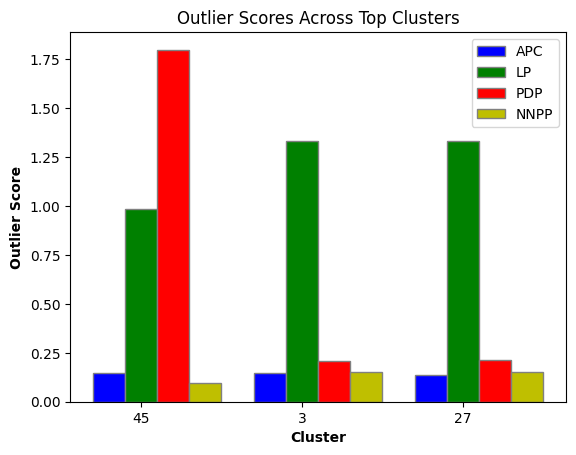

In [ ]:
#Outlier Scores Across Top Clusters

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
clusters = [45, 3, 27]
APC_scores = [0.1451090434457107, 0.1483848494624029, 0.13589388666003818]
LP_scores = [0.983815602428787, 1.3350168833797678, 1.3326090196475822]
PDP_scores = [1.799708080127295, 0.20970219158591882, 0.21106098090401246]
NNPP_scores = [0.09755636956880114, 0.15270486931771712, 0.1523243256783723]

# Set width of bars
bar_width = 0.2

# Set position of bars on X axis
r1 = range(len(clusters))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the plot
plt.bar(r1, APC_scores, color='b', width=bar_width, edgecolor='grey', label='APC')
plt.bar(r2, LP_scores, color='g', width=bar_width, edgecolor='grey', label='LP')
plt.bar(r3, PDP_scores, color='r', width=bar_width, edgecolor='grey', label='PDP')
plt.bar(r4, NNPP_scores, color='y', width=bar_width, edgecolor='grey', label='NNPP')

# Add xticks on the middle of the group bars
plt.xlabel('Cluster', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(clusters))], clusters)
plt.ylabel('Outlier Score', fontweight='bold')
plt.title('Outlier Scores Across Top Clusters')

# Create legend & Show graphic
_ = plt.legend()

plt.show()

From the visualization, we can see that clusters 45, 3 and 27 are the clusters with the highest outliers, with cluster 45 having the highest votes for PDP with <1.75 while LP had the second highest outlier score cummulative highest.


In conclusion, tribalism had a major influence on the pre and post electoral process. Anambra being the state of one of the electoral candidates, Mr. Peter Obi, the people of the state thought it right to vote one of their own into the presidency. Unfortunately it didn't turn out to be so, but from my analysis it shows that the people of Anambra had a bias to one of the candidates.
